In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares

In [2]:
df = pd.read_excel("Autocatalytic_Rxn_1.xlsx")
t_data = df['Time (t)'].values
B_data = df['CB (t)'].values

In [3]:
#In first part ODE solving is being done

#returns dy/dt
def rate(t, y, k1, k2):
    A, B, C = y

    dA_dt = -k1*A*B
    dB_dt = k1*A*B - k2*B
    dC_dt = k2*B
    
    return [dA_dt, dB_dt, dC_dt]


def solve_system(t, k1, k2):
    initial_concs = [1, 0.1, 0.0]
    t_span = [0, t[-1]]
    sol = solve_ivp(rate, t_span, initial_concs, args=(k1, k2), t_eval=t)

    return sol
    
    
#We have solved the ode now using ode solving we predict B_conc for a t
def B_t_model_pred(t, k1, k2):
    sol = solve_system(t, k1, k2)
    B_conc = sol.y[1]
    
    return B_conc

#We check how much the predicted differs from the actual B_conc from data
def residuals(params, t_data, B_data):
    k1, k2 = params
    B_pred = B_t_model_pred(t_data, k1, k2)
    
    return B_pred - B_data
    


In [4]:
#now fitting is done
def fit(initial_guess):
    result = least_squares(residuals, initial_guess, args=(t_data, B_data))
    return result

initial_guess = [0.1, 0.05]
result = fit(initial_guess)

k1_opt, k2_opt = result.x
B_fitted = B_t_model_pred(t_data, k1_opt, k2_opt)

print(f"Optimal k1: {k1_opt}")
print(f"Optimal k2: {k2_opt}")
print(f"Optimal B: {np.max(B_fitted)}")
print(f"Time at which Optimal B occurs: {t_data[np.argmax(B_fitted)]}")

Optimal k1: 0.9999999998403856
Optimal k2: 0.19999999999528528
Optimal B: 0.5787007981953892
Time at which Optimal B occurs: 4.36241610738255


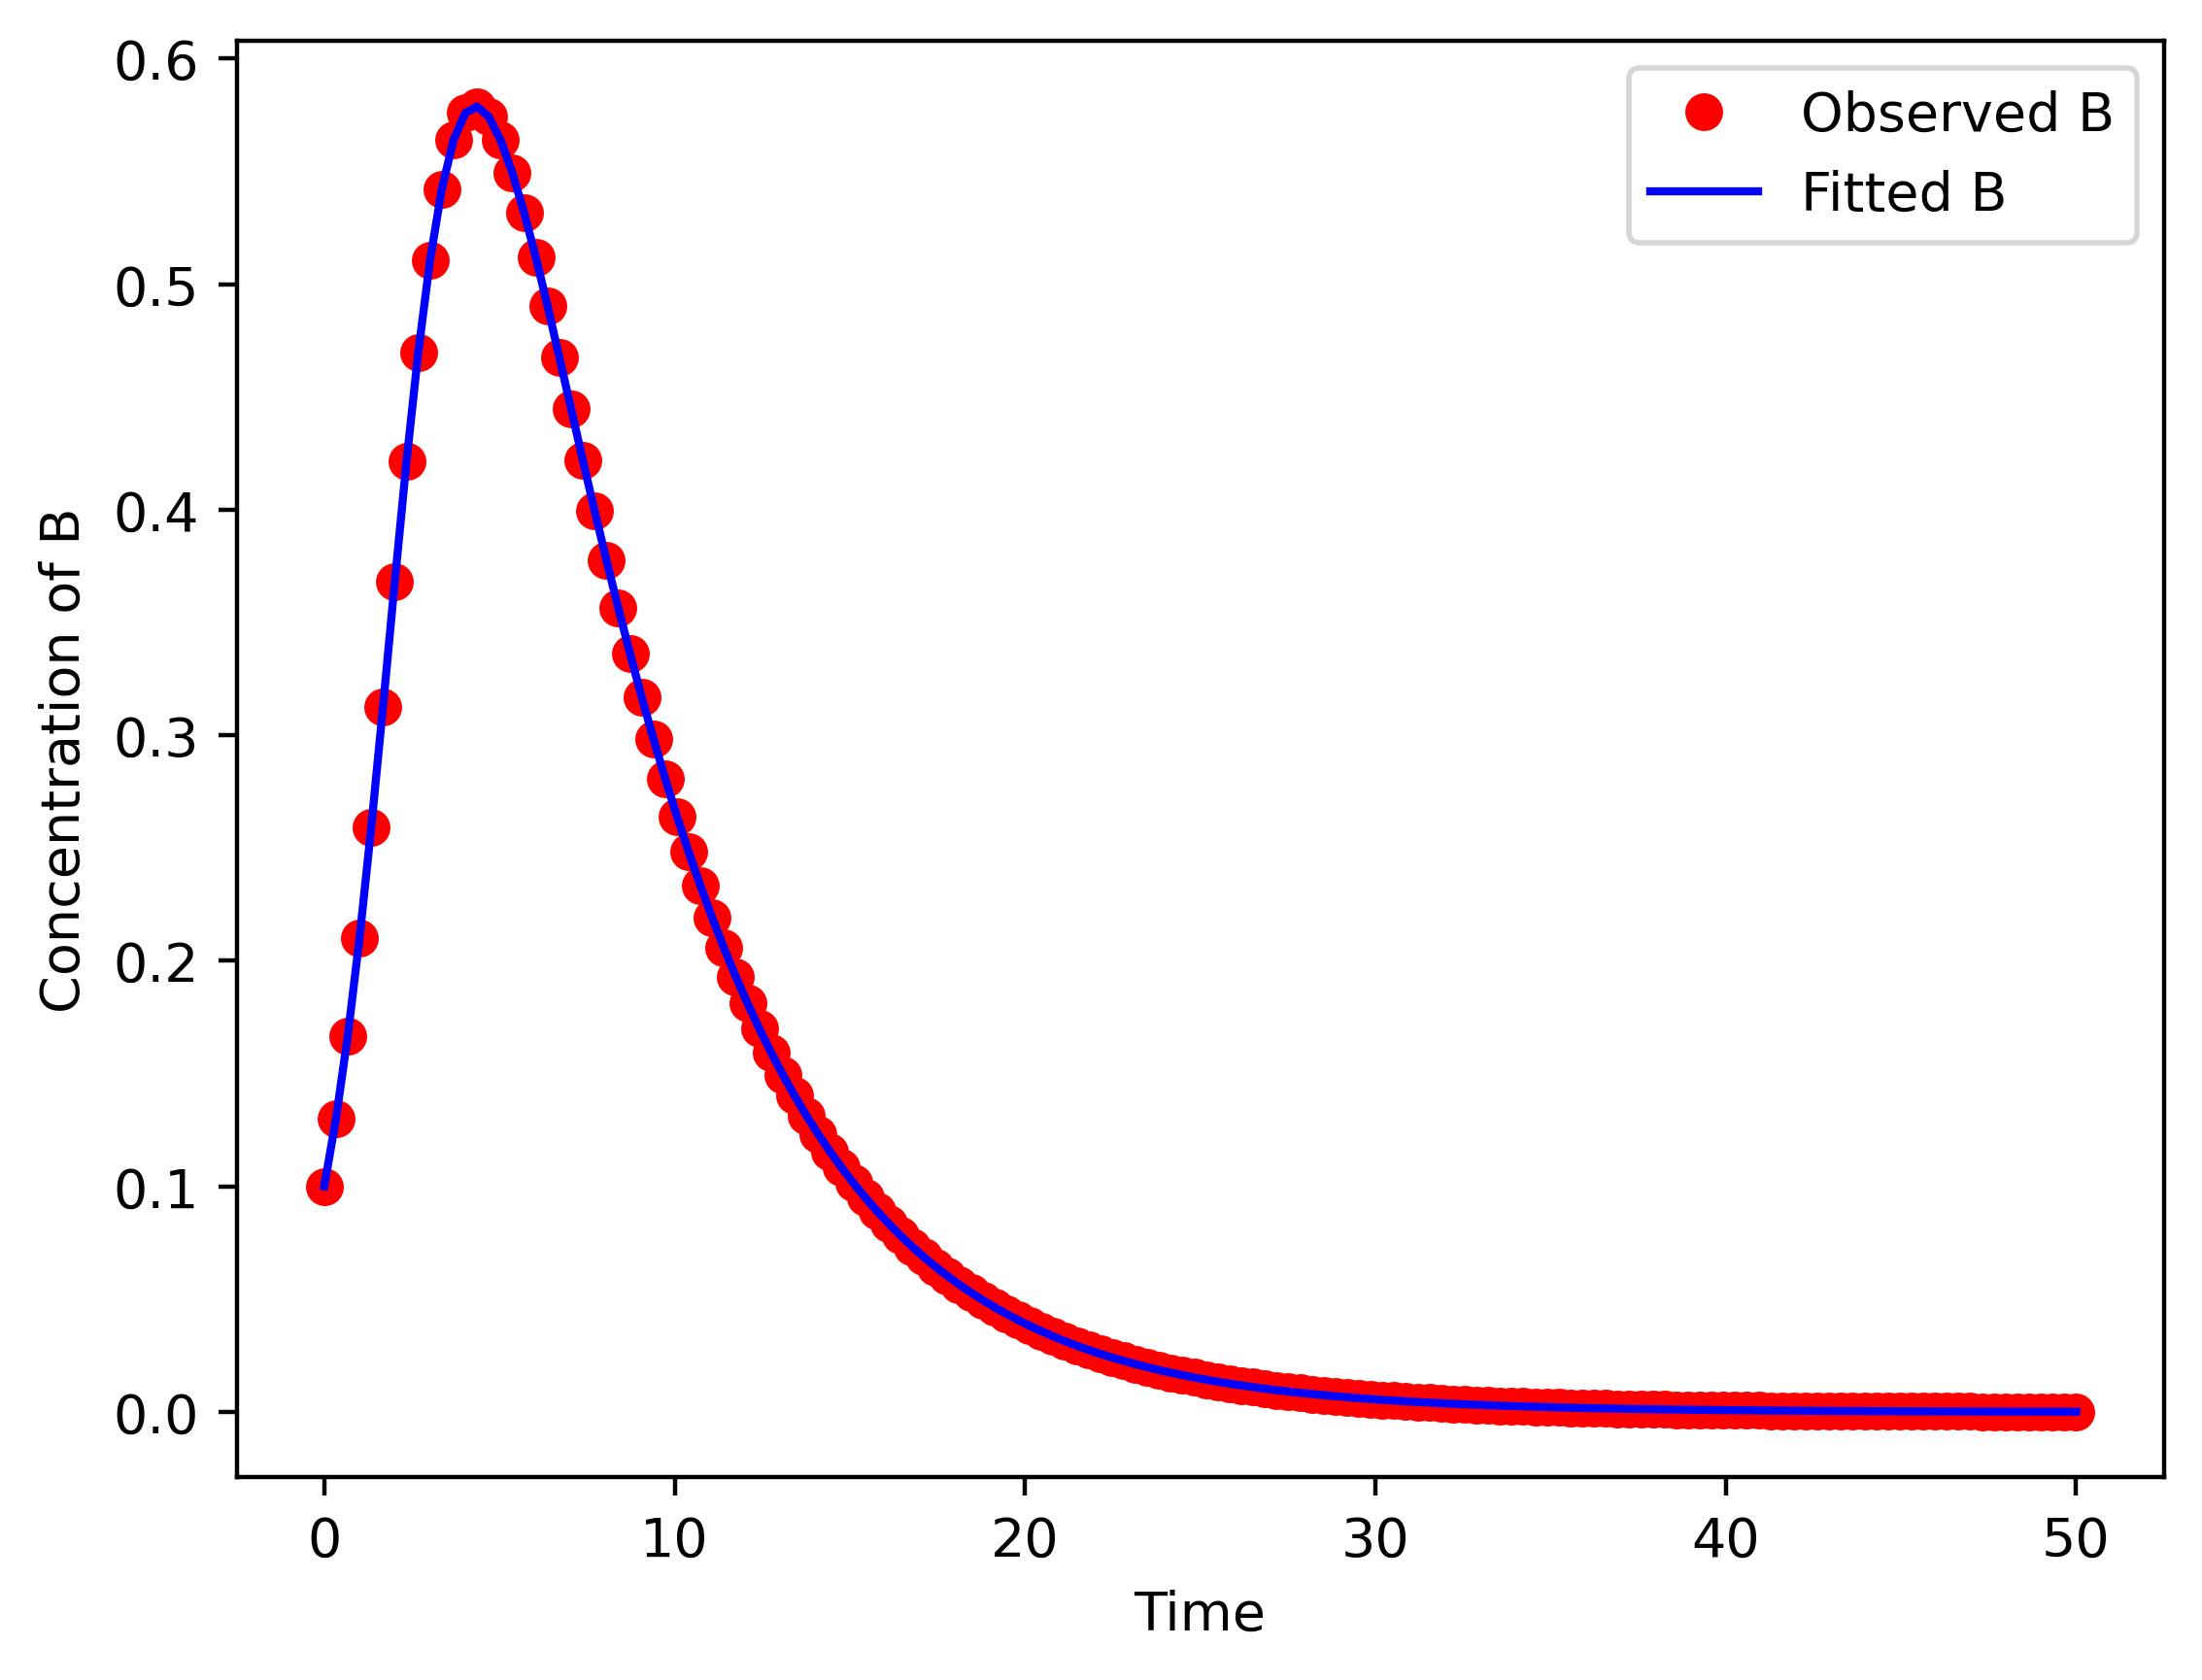

In [13]:
# Plot the data and the fitted curve
plt.plot(t_data, B_data, 'ro', label="Observed B")
plt.plot(t_data, B_fitted, 'b-', label="Fitted B")
plt.xlabel('Time')
plt.ylabel('Concentration of B')
plt.legend()
fig = plt.gcf()
fig.set_dpi(400)
plt.show()
fig.savefig('model_fitted.png', dpi=400, bbox_inches='tight') 